In [30]:
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [31]:
dataset = r'C:\Users\yash\Documents\Sem 7\SGP\COVID19 Detection\Data//'

In [32]:
INIT_LR = 1e-5
EPOCHS = 60
BS = 1

In [33]:
args={}
args["dataset"]=dataset

In [34]:
args

{'dataset': 'C:\\Users\\yash\\Documents\\Sem 7\\SGP\\COVID19 Detection\\Data//'}

In [35]:
import numpy as np
import cv2

In [36]:
from imutils import paths

In [37]:
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [38]:
image[10]

array([[ 53,  53,  53],
       [ 58,  58,  58],
       [ 62,  62,  62],
       [ 62,  62,  62],
       [ 70,  70,  70],
       [ 71,  71,  71],
       [ 68,  68,  68],
       [ 73,  73,  73],
       [ 71,  71,  71],
       [ 70,  70,  70],
       [ 73,  73,  73],
       [ 73,  73,  73],
       [ 69,  69,  69],
       [115, 115, 115],
       [143, 143, 143],
       [123, 123, 123],
       [120, 120, 120],
       [111, 111, 111],
       [118, 118, 118],
       [115, 115, 115],
       [114, 114, 114],
       [124, 124, 124],
       [120, 120, 120],
       [130, 130, 130],
       [124, 124, 124],
       [126, 126, 126],
       [127, 127, 127],
       [123, 123, 123],
       [136, 136, 136],
       [137, 137, 137],
       [143, 143, 143],
       [142, 142, 142],
       [143, 143, 143],
       [146, 146, 146],
       [140, 140, 140],
       [132, 132, 132],
       [109, 109, 109],
       [103, 103, 103],
       [104, 104, 104],
       [100, 100, 100],
       [ 95,  95,  95],
       [ 94,  94

In [39]:
image.shape

(224, 224, 3)

In [40]:
labels

array(['Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Covid',
       'Data//Covid', 'Data//Covid', 'Data//Covid', 'Data//Cov

In [41]:
Cimages = os.listdir(dataset+"Covid")
Nimages = os.listdir(dataset+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


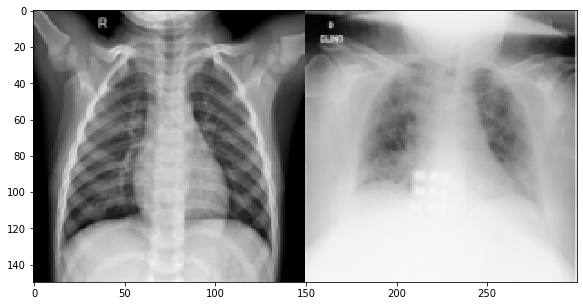

Normal Chest X-ray Vs Covid-19 Chest X-ray


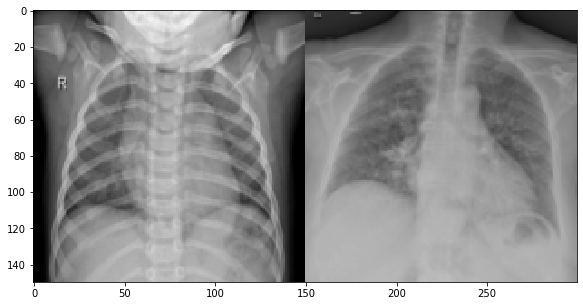

Normal Chest X-ray Vs Covid-19 Chest X-ray


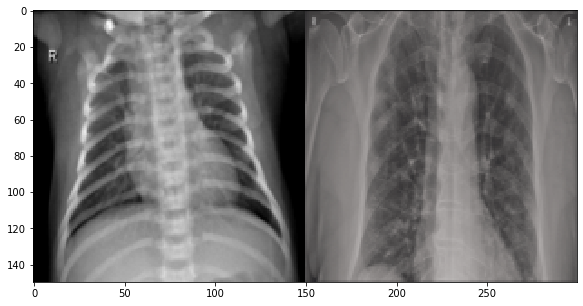

Normal Chest X-ray Vs Covid-19 Chest X-ray


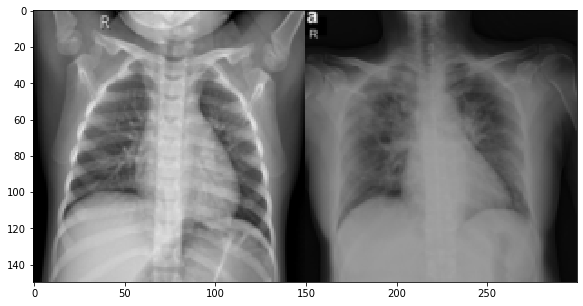

Normal Chest X-ray Vs Covid-19 Chest X-ray


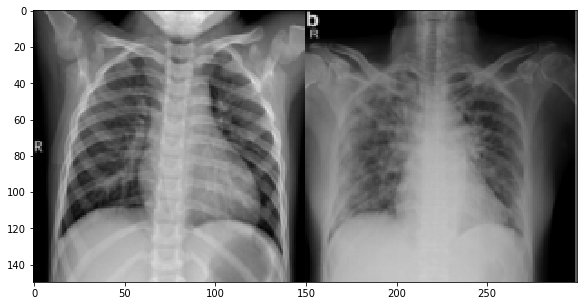

In [42]:
import skimage
def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [43]:
LB = LabelBinarizer()  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

In [25]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [44]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [45]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("Y_train Shape: ",Y_train.shape)
print("Y_test Shape: ",Y_test.shape)

X_train Shape:  (160, 224, 224, 3)
X_test Shape:  (40, 224, 224, 3)
Y_train Shape:  (160, 2)
Y_test Shape:  (40, 2)


In [46]:
trainAug = ImageDataGenerator(rotation_range=15,fill_mode="nearest")

In [47]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [48]:
hModel = bModel.output #head_Model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((160, 224, 224, 3), (40, 224, 224, 3), (160, 2), (40, 2))

C:\Users\yash\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


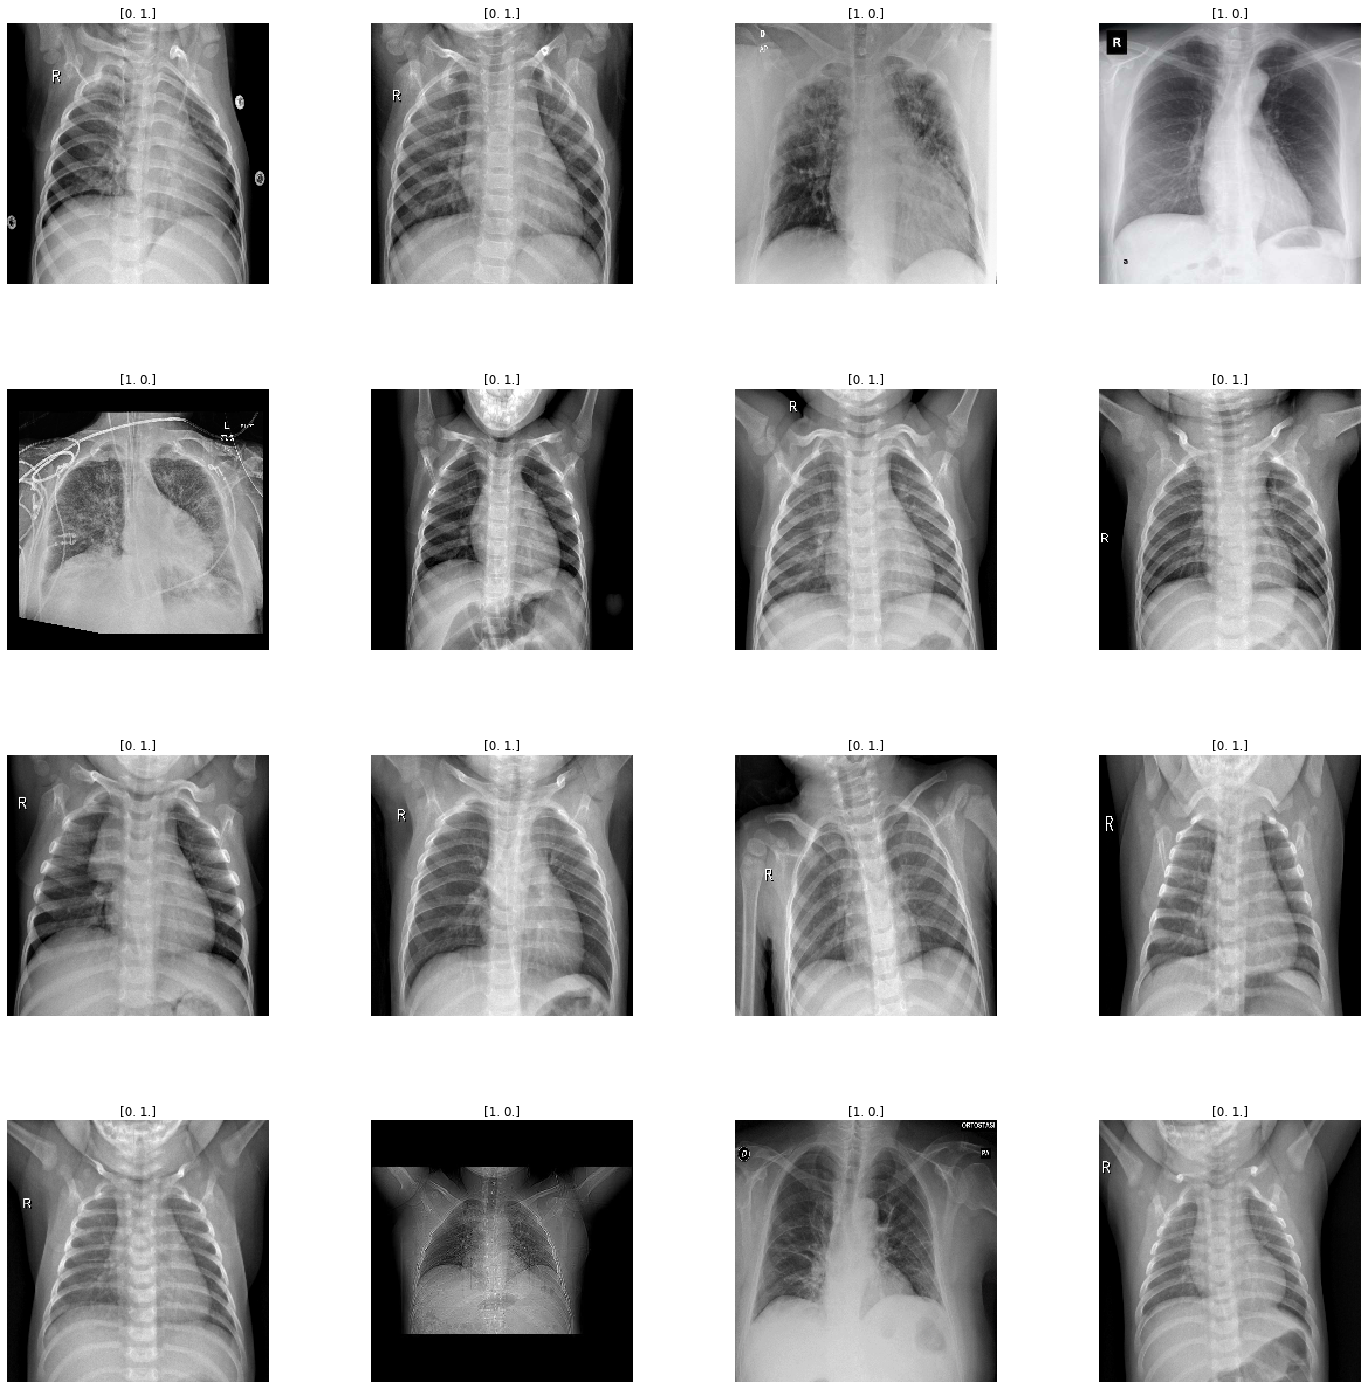

In [51]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [52]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts
Epoch 1/60
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
160/160 [==============================] - 46s 287ms/step - loss: 0.7876 - acc: 0.4625 - val_loss: 0.6798 - val_acc: 0.5250
Epoch 2/60
160/160 [==============================] - 20s 127ms/step - loss: 0.7411 - acc: 0.5375 - val_loss: 0.6707 - val_acc: 0.5750
Epoch 3/60
160/160 [==============================] - 33s 206ms/step - loss: 0.7279 - acc: 0.5437 - val_loss: 0.6625 - val_acc: 0.6500
Epoch 4/60
160/160 [==============================] - 35s 218ms/step - loss: 0.7055 - acc: 0.5625 - val_loss: 0.6555 - val_acc: 0.7000
Epoch 5/60
160/160 [==============================] - 32s 198ms/step - loss: 0.7094 - acc: 0.5938 - val_loss: 0.6484 - val_acc: 0.8250
Epoch 6/60
160/160 [==============================] - 30s 190ms/step - loss: 0.7040 - acc: 0.5437 - val_loss: 0.6426 - val_acc: 0.8250
Epoch 7/60
160/160 [==============================] - 37s 229ms/step - loss: 0.

160/160 [==============================] - 20s 124ms/step - loss: 0.4259 - acc: 0.8813 - val_loss: 0.4177 - val_acc: 0.9250
Epoch 59/60
160/160 [==============================] - 20s 124ms/step - loss: 0.4329 - acc: 0.8750 - val_loss: 0.4134 - val_acc: 0.9250
Epoch 60/60
160/160 [==============================] - 20s 124ms/step - loss: 0.4044 - acc: 0.9312 - val_loss: 0.4097 - val_acc: 0.9250


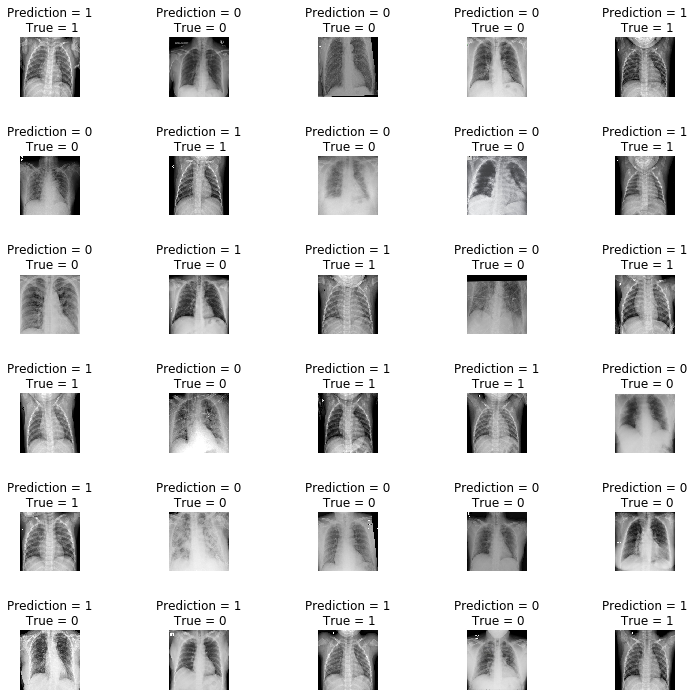

In [53]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1) 

In [54]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

 Data//Covid       1.00      0.85      0.92        20
Data//Normal       0.87      1.00      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.925

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[17  3]
 [ 0 20]]
acc: 0.9250
sensitivity: 0.8500
specificity: 1.0000


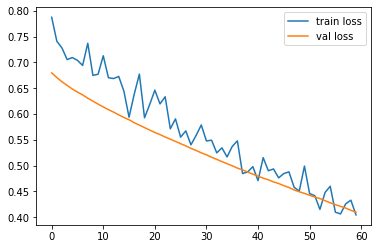

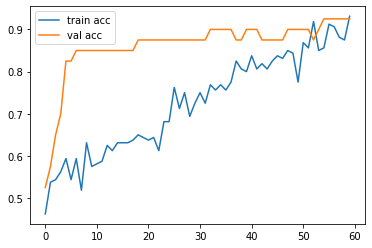

In [57]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['acc'], label='train acc')
plt.plot(R.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [58]:
model.save('model.h5')

Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Prediction: Corona


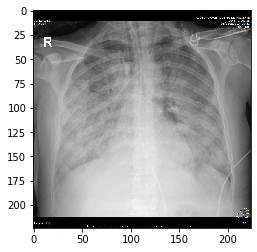

In [59]:
import tensorflow as tf 
from keras.preprocessing import image
#from keras.models import load_model
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg', target_size=(224, 224)) #insert a random covid-19 x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')

Prediction: Normal


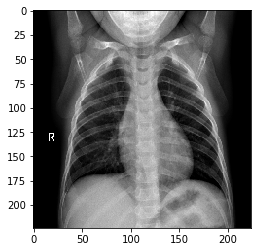

In [60]:
img = image.load_img('Data/Normal/IM-0226-0001.jpeg', target_size=(224, 224)) #insert a random normal x-ray image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')